# Método CRISP-DM aplicado a la predicción de precios de hogares en el área metropolitana

## Entendimiento del Negocio


https://eafit-my.sharepoint.com/:w:/g/personal/lagonzala1_eafit_edu_co/ETHPB5HNXmZKqmOdtcFGZR4BHfAYmSyKaGVeLXXzUd0zPQ?e=2G8KqK


## Entendimiento de los datos

### Carga de datos:

In [1772]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

ugly_data = pd.read_json("readydata.json")


In [1773]:
df = pd.read_json("readydata.json")
df.head()

,ID de la propiedad,Tipo de Operacion,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Venta,Apartamento,Antioquia,Bello,Niquia,neighbourhood,59.0,NaN,3,...,False,False,False,True,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
1,192805940,Venta,Apartamento,Antioquia,Bello,Andalucia,neighbourhood,64.9,64.9,3,...,False,False,False,True,2025-08-29,2025-08-29,"Apartamento en Venta en Andalucia, Bello",/apartamento-en-venta-en-andalucia-bello/19280...,280000000,280000000
2,192833958,Venta,Apartamento,Antioquia,Bello,Bello,city,67.0,NaN,3,...,False,False,False,True,2025-09-04,2025-10-30,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192833958,260241000,260000000
3,192839470,Venta,Apartamento,Antioquia,Bello,Bello,city,72.0,72.0,3,...,False,False,False,True,2025-09-05,2025-09-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192839470,433369521,433000000
4,192852231,Venta,Casa,Antioquia,Bello,Prado,neighbourhood,91.0,91.0,3,...,False,False,False,True,2025-09-09,2025-09-29,"Casa en Venta en Prado, Bello",/casa-en-venta-en-prado-bello/192852231,295000000,295000000


# Breve preparación para posterior análisis


### Orígen de los datos
Antes de proceder, es importante comprender de dónde provienen estos datos.

Estos fueron extraídos de un portal web utilizando ténicas de web scraping, estos datos son disponibles públicamente. 

El web scraping no es infalible, se asume la existencia se ciertos elementos en las páginas que se visitan y, si el nombre de variables cambia, o si estas no aparecen, errores inesperados pueden suceder.

Es por esto que se hace necesario este primer análsis, garantizando la integridad del proceso.

In [1774]:
df.shape

(5827, 31)

In [1775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5827 entries, 0 to 5826
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID de la propiedad                  5827 non-null   int64  
 1   Tipo de Operacion                   5827 non-null   object 
 2   Tipo de Inmueble                    5827 non-null   object 
 3   Departamento                        5827 non-null   object 
 4   Ciudad                              5827 non-null   object 
 5   Localidad Principal                 5823 non-null   object 
 6   Tipo de Localidad Principal         5823 non-null   object 
 7   Metros Cuadrados                    5785 non-null   float64
 8   Metros Cuadrados Construidos        4828 non-null   float64
 9   Estrato                             5827 non-null   int64  
 10  Latitud                             5827 non-null   float64
 11  Longitud                            5827 non-nul

Por lo que podemos ver, hay algunos registros vacíos, por lo tanto no está completo del todo. Sin embargo el dataset no tiene vacíos aparentes que puedan aportar más información acerca del precio del arriendo de los hogares.

## Selección de columnas y leve preparación.

Que algunas columnas sean de tipo "object" es engañoso, object puede contener realmente cualquier cosa. Esto puede sugerir que en algunas columnas hay números donde no debe haber, o strings, o cualquier cosa.

Para ello se verificará lo siguiente:

1- Tipo de operacion: Todas las operaciones deben ser de tipo "Venta" si no hubo fallas en la extracción.

2- Tipo de Inmueble: Analizar los valores únicos de la columna y verificar sean como se espera.

3- Departamento: Todas las filas deberían tener como departamento "Antioquia". 

4- Ciudad: Se deben analizar los elementos únicos de la columna ciudad y contrastar con las ciudades del Área Metropolitana del Valle de Aburrá que se planea usar en el proyecto (Medellín, Envigado, Sabaneta, Itagüi, La Estrella y Bello).

5- Localidad Principal: Al momento de la extracción no es claro aún qué representaba esta etiqueta en el sistema del portal, por esto se hará un análisis de los valores únicos.

6- Tipo de Localidad Principal: Semejante a lo anterior.

7- Analizar la variable "Es Proyecto?" aparentemente booleana y verificar por qué se ha leído como float64.

8- Fechas: Nuevamente, object puede ser cucalquier cosa, se debe intentar la conversión a fecha y analizar si hay algun error por formato incorrecto.

9- Finalmente, analizar las variables booleanas y decidir si  son suficientemente relevantes.

** **Verificar tipo de Operación** **

In [1776]:
# Tipo de operacion.

df["Tipo de Operacion"].nunique()

# Sólo hay un tipo de operación, lo cual es congruente, todas las filas son ventas.

1

In [1777]:
# Eliminamos la columna pues ya no es relevante para mayor análisis.

df.drop(columns=["Tipo de Operacion"], inplace=True)

** **Verificar tipo de Inmuebles** **

In [1778]:
# Verificar los tipos de inmuebles.

df["Tipo de Inmueble"].unique()

# Similarmente, hay dos opciones en el dataset: Apartamento y Casa. Esto es congruente.

array(['Apartamento', 'Casa'], dtype=object)

In [1779]:
# Finalmente convertimos la columna a string

df["Tipo de Inmueble"] = df["Tipo de Inmueble"].astype(str)


** **Verificar Departamento** **

In [1780]:
df["Departamento"].nunique()

# Aquí vemos algo extraño... Hay 4 departamentos, cuando debería haber uno. Veamos cuáles son...

4

In [1781]:
df["Departamento"].unique()

# Hay datos del Magdalena, de Bogotá y de Cundinamarca. Veamos cuántos son.

array(['Antioquia', 'Magdalena', 'Bogotá, d.c.', 'Cundinamarca'],
      dtype=object)

In [1782]:
df[df["Departamento"] != "Antioquia"]

# Interesante... Afortunadamente sólo son 4 de las filas, estos apartamentos existen 

,ID de la propiedad,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
559,192532640,Casa,Magdalena,Bello,Bello,city,116.0,116.0,3,11.212865,...,False,False,False,True,2025-06-15,2025-10-22,Casa en Venta en Bello,/casa-en-venta-en-bello/192532640,255147000,255000000
1197,192712949,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,57.0,57.0,4,4.620578,...,False,False,False,True,2025-08-02,2025-08-04,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192712949,377330000,377000000
1218,192696286,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,76.0,76.0,4,4.731276,...,False,False,False,True,2025-07-29,2025-09-05,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192696286,610450000,610000000
2071,193032462,Casa,Cundinamarca,Medellín,Medellín,city,186.0,186.0,4,5.026003,...,False,False,False,True,2025-10-27,2025-10-28,Casa en Venta en Medellín,/casa-en-venta-en-medellin/193032462,910457000,910000000


In [1783]:
# Borraré estos datos pues, luego de verificarlos manualmente, no corresponden al área metropolitana
# NOTA: Para verificación manual puede googlear el URL respectivo asociado a esta columna.

df = df[df["Departamento"] == "Antioquia"]

In [1784]:
df["Departamento"].unique()

# Ahora sí, todo en orden...

array(['Antioquia'], dtype=object)

In [1785]:
# Como todos los registros, a partir de aquí, tienen el mismo departamento. 
# Se elimina la columna

df.drop(columns=["Departamento"], inplace=True)

** **Breve Análisis de Ciudad** **

In [1786]:
df["Ciudad"].unique()

# Definitivamente hay ciudades que no corresponden a las ciudades especificadas anteriormente como campo de estudio.

# Como están fuera de la población estudiada, se eliminarán, pero antes veamos cuántas muestras erroneas tenemos

array(['Bello', 'Medellín', 'Copacabana', 'Acevedo', 'Santa ana',
       'La mesa', 'La ceja', 'La primavera', 'Sabaneta', 'San jose',
       'La estrella', 'Envigado', 'Jardín', 'Villanueva', 'Miraflores',
       'Itaguí', 'Santa maria', 'Rionegro', 'La paz', 'El Retiro',
       'Guatapé', 'Caldas', 'Manizales', 'San martin'], dtype=object)

In [1787]:
ciudades = ("Medellín", "Envigado", "Sabaneta", "Itaguí", "La estrella", "Bello")

In [1788]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].count()

# Como se observa, no son muchas.

# Pero antes, verifiquemos que los valores de ciudad unicos de este grupo no contengan estas ciudades
# (Tal vez un error de escritura de valores de nuestra parte)

np.int64(55)

In [1789]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

# Ahora es claro que las ciudades que quedan no son las estudiadas. Procedemos a eliminarlas de los datos.


array(['Copacabana', 'Acevedo', 'Santa ana', 'La mesa', 'La ceja',
       'La primavera', 'San jose', 'Jardín', 'Villanueva', 'Miraflores',
       'Santa maria', 'Rionegro', 'La paz', 'El Retiro', 'Guatapé',
       'Caldas', 'Manizales', 'San martin'], dtype=object)

In [1790]:
df[df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

array(['Bello', 'Medellín', 'Sabaneta', 'La estrella', 'Envigado',
       'Itaguí'], dtype=object)

In [1791]:
df = df[df["Ciudad"].isin(ciudades)]

** **Entender qué significa "Localidad Principal"** **


In [1792]:
# Comenzaré analizando los valores del nombre de localidad principal

df["Tipo de Localidad Principal"].unique()

array(['neighbourhood', 'city', 'commune', 'zone', None], dtype=object)

In [1793]:
df[df["Tipo de Localidad Principal"] == "city"][["Localidad Principal", "Tipo de Localidad Principal"]]

# Si es ciudad, es la ciudad donde la propiedad está ubicada

,Localidad Principal,Tipo de Localidad Principal
2,Bello,city
3,Bello,city
7,Medellín,city
8,Bello,city
9,Bello,city
...,...,...
5772,La estrella,city
5778,La estrella,city
5803,La estrella,city
5804,La estrella,city


In [1794]:
#  Análogamente....

df[df["Tipo de Localidad Principal"] == "commune"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
15,Comuna 10,commune
55,Comuna 9,commune
82,Comuna 10,commune
112,Comuna 3,commune
138,Comuna 3,commune
...,...,...
3881,Comuna 3,commune
4027,Comuna 4,commune
4432,Comuna 4,commune
4481,Comuna 4,commune


In [1795]:
df[df["Tipo de Localidad Principal"] == "zone"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
1389,Suroriente,zone
2219,Centro,zone
2278,Centro,zone
2311,Suroriente,zone
2438,Centro,zone
2529,Centro,zone
3465,Suroriente,zone
3476,Suroriente,zone
4264,Suroriente,zone
4279,Suroriente,zone


In [1796]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
0,Niquia,neighbourhood
1,Andalucia,neighbourhood
4,Prado,neighbourhood
5,Zona industrial 1,neighbourhood
6,Cabañas,neighbourhood
...,...,...
5822,La ferreira,neighbourhood
5823,Suramerica,neighbourhood
5824,La Tablaza,neighbourhood
5825,La ferreria,neighbourhood


In [1797]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]].iloc[:, 0].unique()

# Revisando parece que corresponde a barrios reales, sin embargo, este no es el punto de este análisis. Este se hará más adelante.

array(['Niquia', 'Andalucia', 'Prado', 'Zona industrial 1', 'Cabañas',
       'Centro', 'San gabriel', 'Las vegas', 'La Navarra', 'Madera',
       'Santa ana', 'Sector belvedere', 'Nazareth', 'Buenos aires',
       'Zona industrial 3', 'Cabañitas', 'Fabricato', 'El trapiche',
       'El rosario', 'Parque tulio ospina', 'Bellavista', 'La gabriela',
       'Bucaros', 'Villas del sol', 'Paris', 'Altavista', 'Salento',
       'Hato viejo', 'El mirador', 'Barrio Nuevo',
       'Urbanizacion amazonia', 'El paraiso', 'Fontidueño', 'Los alpes',
       'San jose obrero', 'Urbanizacion palmar de serramonte',
       'Hospital mental', 'Playa rica', 'Laureles', 'El carmelo',
       'La primavera', 'Porvenir', 'San Antonio de Pereira', 'Quitasol',
       'Pachelly', 'Altos de quitasol', 'Asentamiento la orquidea',
       'Belén Los Alpes', 'Suarez', 'Los sauces', 'Carmelo', 'San martin',
       'San Felix', 'Molinares', 'Manchester', 'El Poblado', 'Terranova',
       'Alcala', 'Proyecto terranova',

In [1798]:
# ¿ Qué se hará con esta columna? Idealmente diría nos daría la información más específica posible, en este caso barrio, 
# pero como se ha visto hay bastantes casos en los que esto no pasa. Contemos en cuántos no...

df[~(df["Tipo de Localidad Principal"] == "neighbourhood")][["Localidad Principal", "Tipo de Localidad Principal"]].count()

# En 1144 instancias no se provee esta información (y eso sin hacer análisis de consistencia)

# Se prevee buscar otra forma de hallar los barrios, hasta ahora se ha analizado la posibilidad de usar Nomatim, una API de geolocalización
# reversa gratuita. Consúltese: https://operations.osmfoundation.org/policies/nominatim/

# Si esto no funciona, se prevee extrapolar la información de barrio a partir de las coordenadas de longitud y latitud basándonos en los
# datos ya recopilados.

Localidad Principal            1144
Tipo de Localidad Principal    1144
dtype: int64

** **Breve Análisis de la variable "Es Proyecto?"** **

In [1799]:
df["Es Proyecto?"].unique()

# Es proyecto toma valores nulos o 1. 

array([nan,  1.])

In [1800]:
df["Es Proyecto?"].sum()
# Como se evidencia, sólo en 12 casos toma valores 1. Es decir, el resto son Nulos.

np.float64(12.0)

In [1801]:
# Al haber tantos nulos, se decide eliminar la columna

df.drop(columns=["Es Proyecto?"], inplace=True)

** **Breve Análisis de fechas"** **

In [1802]:
col_fechas =  ["Fecha de Creacion de Oferta", "Fecha de Actualización de Oferta"]

df[col_fechas]

# Como se observa parecen seguir el formato YYYY-MM-DD

# Falta verificarlo, se crea el siguiente regex que concuerda con esto y se compara el número
# de filas que concuerdan con esto.


,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta
0,2025-08-25,2025-09-16
1,2025-08-29,2025-08-29
2,2025-09-04,2025-10-30
3,2025-09-05,2025-09-20
4,2025-09-09,2025-09-29
...,...,...
5822,2025-10-22,2025-10-22
5823,2025-10-22,2025-10-22
5824,2025-10-23,2025-10-23
5825,2025-10-24,2025-10-24


In [1803]:
regex_fecha = r'^\d{4}-\d{2}-\d{2}$'

mask = df[col_fechas].apply(lambda col: col.astype(str).str.match(regex_fecha))

In [1804]:
df[mask][col_fechas].count()

# Como se observa todos cumplen el formato. (Conformidad-Validez)

# Convirtamos las columnas a date_time para mayor análisis.

Fecha de Creacion de Oferta         5768
Fecha de Actualización de Oferta    5768
dtype: int64

In [1805]:
df["Fecha de Actualización de Oferta"] = pd.to_datetime(df["Fecha de Actualización de Oferta"])
df["Fecha de Creacion de Oferta"] = pd.to_datetime(df["Fecha de Creacion de Oferta"])


In [1806]:
df["Fecha de Actualización de Oferta"].describe()

# El rango de fechas parece conforme a lo esperado.

# La actualización más antigüa fue en hace casi 8 meses.

count                             5768
mean     2025-09-27 00:39:26.712898560
min                2025-03-14 00:00:00
25%                2025-09-12 00:00:00
50%                2025-10-14 00:00:00
75%                2025-10-27 00:00:00
max                2025-11-04 00:00:00
Name: Fecha de Actualización de Oferta, dtype: object

In [1807]:
df["Fecha de Creacion de Oferta"].describe()

# Sin embargo, la publicación más antigua recopilada data del 2019, hace casi 6 años.

# Esto no afecta los datos pues toda fila, como hemos visto, tiene fecha de actualización
# y de creación de oferta. Por tanto, la propiedad menos actualizada es de hace 8
# meses y creemos es un intervalo de tiempo aún razonable.

count                             5768
mean     2025-08-09 10:34:07.156726528
min                2019-11-19 00:00:00
25%                2025-07-24 00:00:00
50%                2025-09-19 00:00:00
75%                2025-10-17 00:00:00
max                2025-11-01 00:00:00
Name: Fecha de Creacion de Oferta, dtype: object

** **Breve Análisis de Booleanos** **

In [1808]:
df["Es Oficina?"].unique()

# Todos los valores de Es Oficina? son falsos. 


array([False])

In [1809]:
df["Es Oficina?"].sum()
# Por tanto, se eliminará de los datos.

np.int64(0)

In [1810]:
df.drop(columns=["Es Oficina?"], inplace=True)

In [1811]:
df["Es Penthouse?"].sum()

# Todos los valores de Es Penthouse? son falsos.
# Por lo tanto, se eliminará de los datos

np.int64(0)

In [1812]:
df.drop(columns=["Es Penthouse?"], inplace=True)

In [1813]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Metros Cuadrados Construidos', 'Estrato',
       'Latitud', 'Longitud', 'Antigüedad (Grupo)', 'Cuartos (rooms)',
       'Dormitorios (bedrooms)', 'Baños', 'Parqueaderos', 'Piso',
       'Tiene Garage?', 'Es Unidad Projecto?', 'Acepta Permuta?',
       '(paid quota)?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL',
       'Precio con Administración Incluida', 'Precio'],
      dtype='object')

In [1814]:
df["Tiene Garage?"].sum()

np.int64(4328)

In [1815]:
df[df["Tiene Garage?"] == False]["Tiene Garage?"].count()
# Como se observa hay suficientes grupos con y sin garage. Por eso no la quitaremos.

np.int64(1440)

In [1816]:
df["Acepta Permuta?"].sum()

# No hay ofertas que acepten permuta, por ello eliminamos la columna

np.int64(0)

In [1817]:
df.drop(columns=["Acepta Permuta?"], inplace=True)

** **Análisis: ¿Qué significa "paid quota"?** **

In [1818]:
df["(paid quota)?"].unique()

array([ True, False])

In [1819]:
df["(paid quota)?"].count()

np.int64(5768)

In [1820]:
df["(paid quota)?"].sum()

np.int64(5698)

"Paid quota" parece referirse a alguna cuota para utilizar el servicio del portal pues no aparece como elemento HTML en el portal. Es por esto que lo desestimamos para estimar precios pues creemos que no es útil según los objetivos del negocio planteado.

In [1821]:
df.drop(columns=["(paid quota)?"], inplace=True)

In [1822]:
# Similarmente, todas las filas dicen que no son una unidad proyecto. Luego lo desestimamos
# para no hacer análisis innecesario.

df["Es Unidad Projecto?"].unique()

array([False])

In [1823]:
df.drop(columns=["Es Unidad Projecto?"], inplace=True)

** **Breve análisis de la variable dirección** **

In [1824]:
df["Dirección"]

# En la variable de dirección parece se almacena el título a mostrar para la oferta.
# Es útil para realizar el análisis de consistencia posterior.

0                  Apartamento en Venta en Niquia, Bello
1               Apartamento en Venta en Andalucia, Bello
2                          Apartamento en Venta en Bello
3                          Apartamento en Venta en Bello
4                          Casa en Venta en Prado, Bello
                              ...                       
5822    Apartamento en Venta en La ferreira, La estrella
5823            Casa en Venta en Suramerica, La estrella
5824     Apartamento en Venta en La Tablaza, La estrella
5825    Apartamento en Venta en La ferreria, La estrella
5826    Apartamento en Venta en La ferreria, La estrella
Name: Dirección, Length: 5768, dtype: object

### Excelente!
Cabe aclarar que esto son sólo preparativos para un análisis más rigoroso que le sigue a este. 

# Análisis de Cálidad de los Datos


In [1825]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Metros Cuadrados Construidos', 'Estrato',
       'Latitud', 'Longitud', 'Antigüedad (Grupo)', 'Cuartos (rooms)',
       'Dormitorios (bedrooms)', 'Baños', 'Parqueaderos', 'Piso',
       'Tiene Garage?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL',
       'Precio con Administración Incluida', 'Precio'],
      dtype='object')

### Completitud
Hay, por lo general, pocos nulos. Esto excepto en la columna de "Metros Cuadrados Construidos" donde hay 992. 

In [1826]:
df.isna().sum()

ID de la propiedad                      0
Tipo de Inmueble                        0
Ciudad                                  0
Localidad Principal                     4
Tipo de Localidad Principal             4
Metros Cuadrados                       42
Metros Cuadrados Construidos          992
Estrato                                 0
Latitud                                 0
Longitud                                0
Antigüedad (Grupo)                    120
Cuartos (rooms)                         0
Dormitorios (bedrooms)                  0
Baños                                   0
Parqueaderos                            0
Piso                                  213
Tiene Garage?                           0
Fecha de Creacion de Oferta             0
Fecha de Actualización de Oferta        0
Dirección                               0
URL                                     0
Precio con Administración Incluida      0
Precio                                  0
dtype: int64

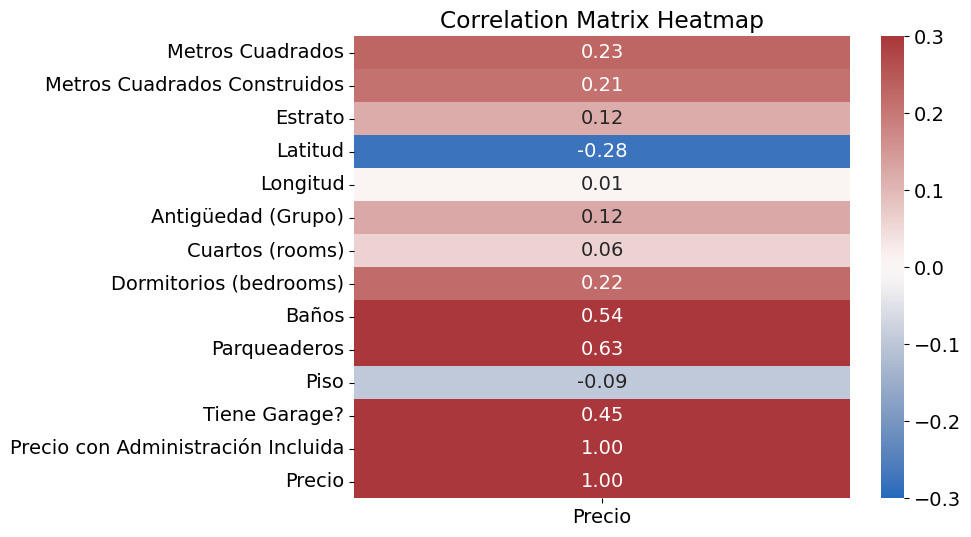

In [1827]:
import seaborn as sns

filtered_ugly = df[(df["Precio"] > 80000000) & (df["Precio"] < 1200000000)]

a = filtered_ugly.iloc[:, 5:17]
b = filtered_ugly.iloc[:, 21:]

corr_matrix = a.join(b).corr()

single_col_corr = corr_matrix[["Precio"]]

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
#sns.heatmap(c, annot=False, cmap='coolwarm', fmt=".2f")

sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

plt.title('Correlation Matrix Heatmap')
plt.show()


In [1828]:
#corr_matrix = a.join(b).corr()

#single_col_corr = corr_matrix[["Precio"]]

#plt.figure(figsize=(8, 6)) # Adjust figure size as needed

#sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

#plt.title('Correlation Matrix Heatmap')
#plt.show()

No hay cosas raras en las columnas de string.

#### Consistencia

In [1829]:
df[(df['Dormitorios (bedrooms)']> df['Cuartos (rooms)']  )]

,ID de la propiedad,Tipo de Inmueble,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,...,Baños,Parqueaderos,Piso,Tiene Garage?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Apartamento,Bello,Niquia,neighbourhood,59.00,NaN,3,6.343308,-75.542227,...,2,0,0.0,False,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
5,192868806,Apartamento,Bello,Zona industrial 1,neighbourhood,47.31,47.31,4,6.331260,-75.561713,...,2,1,5.0,True,2025-09-13,2025-09-13,"Apartamento en Venta en Zona industrial 1, Bello",/apartamento-en-venta-en-zona-industrial-1-bel...,320000000,320000000
14,192886436,Apartamento,Bello,Cabañas,neighbourhood,80.00,80.00,4,6.316385,-75.561869,...,2,0,3.0,False,2025-09-17,2025-09-17,"Apartamento en Venta en Cabañas, Bello",/apartamento-en-venta-en-cabañas-bello/192886436,275000000,275000000
24,191997110,Apartamento,Bello,Sector belvedere,neighbourhood,55.60,55.60,3,6.317037,-75.553427,...,2,1,16.0,True,2025-02-10,2025-07-04,"Apartamento en Venta en Sector belvedere, Bello",/apartamento-en-venta-en-sector-belvedere-bell...,300220000,300000000
25,192961362,Casa,Bello,Cabañas,neighbourhood,98.00,NaN,4,6.317546,-75.561967,...,2,1,1.0,True,2025-10-08,2025-10-15,"Casa en Venta en Cabañas, Bello",/casa-en-venta-en-cabañas-bello/192961362,425000000,425000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,192993306,Apartamento,La estrella,La Tablaza,neighbourhood,56.00,NaN,3,6.132819,-75.636549,...,2,0,11.0,False,2025-10-17,2025-10-17,"Apartamento en Venta en La Tablaza, La estrella",/apartamento-en-venta-en-la-tablaza-la-estrell...,272179000,272000000
5812,193001267,Apartamento,La estrella,La Tablaza,neighbourhood,53.00,NaN,3,6.126712,-75.635613,...,2,0,7.0,False,2025-10-20,2025-10-31,"Apartamento en Venta en La Tablaza, La estrella",/apartamento-en-venta-en-la-tablaza-la-estrell...,237210000,237000000
5813,193002785,Apartamento,La estrella,Pueblo Viejo,neighbourhood,51.00,NaN,3,6.152607,-75.651841,...,2,0,3.0,False,2025-10-20,2025-10-30,"Apartamento en Venta en Pueblo Viejo, La estrella",/apartamento-en-venta-en-pueblo-viejo-la-estre...,230152000,230000000
5815,193001396,Apartamento,La estrella,La ferreria,neighbourhood,69.00,69.00,4,6.151145,-75.636623,...,2,1,20.0,True,2025-10-20,2025-10-20,"Apartamento en Venta en La ferreria, La estrella",/apartamento-en-venta-en-la-ferreria-la-estrel...,377300000,377000000


Registros donde hay mas dormitorios que cuartos, lo cual se contradice

In [1830]:
df[df['Metros Cuadrados'] < df['Metros Cuadrados Construidos'] ]

,ID de la propiedad,Tipo de Inmueble,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,...,Baños,Parqueaderos,Piso,Tiene Garage?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio


Encontramos una casa en san roque y dice que esta en sabaneta

In [1831]:
df = df[df['ID de la propiedad'] != 192701484]

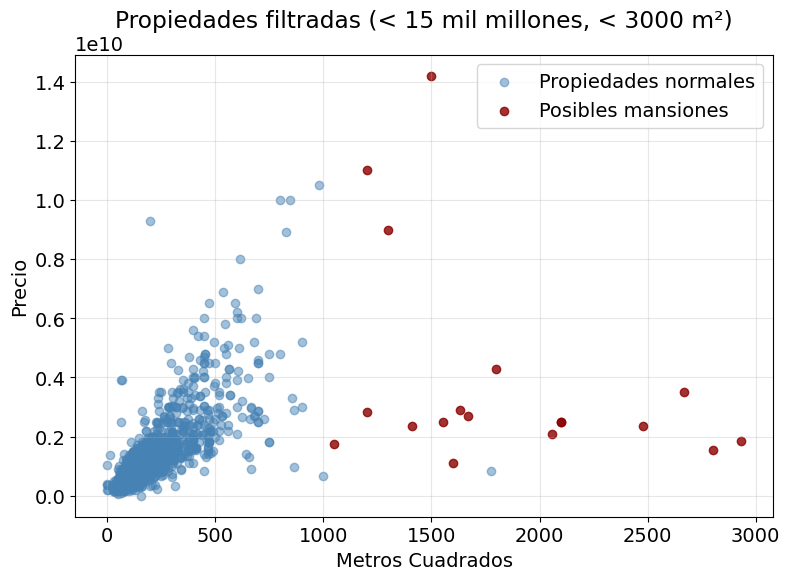

In [1832]:
import matplotlib.pyplot as plt

# --- Filtro de rango razonable ---
df_filtrado = df[(df["Precio"] < 15_000_000_000) & (df["Metros Cuadrados"] < 3000)]

# --- Umbrales para considerar "mansiones" dentro del rango ---
umbral_precio = 1_000_000_000   # ejemplo: más de mil millones
umbral_area = 1000               # más de 400 m²

df_filtrado["es_mansion"] = (df_filtrado["Precio"] > umbral_precio) & (df_filtrado["Metros Cuadrados"] > umbral_area)

# --- Gráfico ---
plt.figure(figsize=(9,6))
plt.scatter(df_filtrado.loc[~df_filtrado["es_mansion"], "Metros Cuadrados"],
            df_filtrado.loc[~df_filtrado["es_mansion"], "Precio"],
            color="steelblue", alpha=0.5, label="Propiedades normales")

plt.scatter(df_filtrado.loc[df_filtrado["es_mansion"], "Metros Cuadrados"],
            df_filtrado.loc[df_filtrado["es_mansion"], "Precio"],
            color="darkred", alpha=0.8, label="Posibles mansiones")

plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Propiedades filtradas (< 15 mil millones, < 3000 m²)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [1833]:
df = df[(df['Metros Cuadrados'] <= 5000 )| (df['Precio'] <= 2e10)]

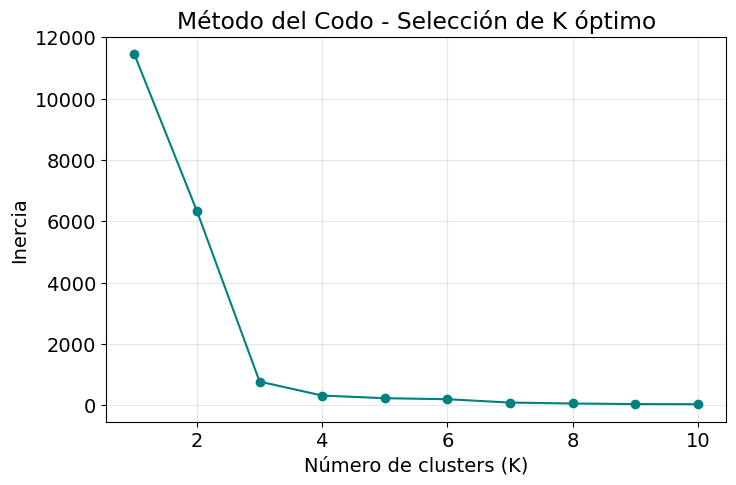

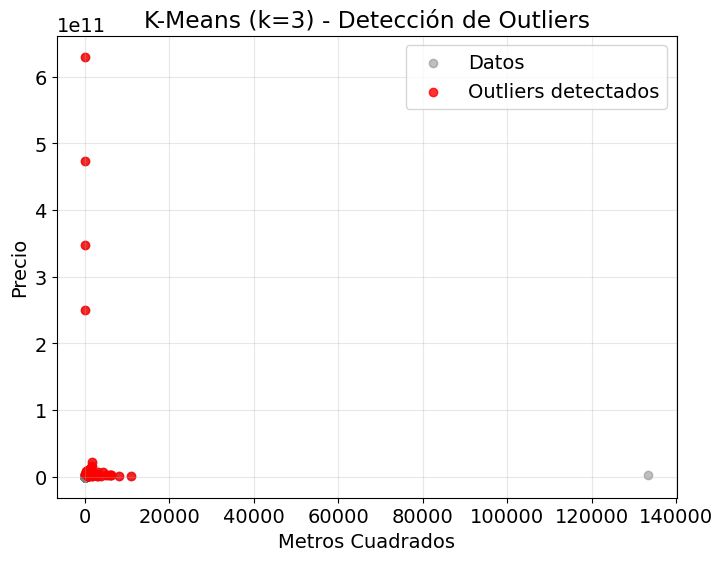

✅ Se eliminaron 144 outliers detectados con K-Means (k=3).
📊 Tamaño final del DataFrame: 5623 registros.


In [1834]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1️⃣ Seleccionar variables relevantes ---
X = df[["Precio", "Metros Cuadrados"]].dropna().astype(float)

# --- 2️⃣ Escalar los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3️⃣ Método del codo para encontrar el mejor K ---
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# --- 4️⃣ Graficar el método del codo ---
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o', color='teal')
plt.title("Método del Codo - Selección de K óptimo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.grid(alpha=0.3)
plt.show()

# --- 5️⃣ Escoge el K donde se nota el 'codo' (puedes ajustar este valor manualmente) ---
# 🔸 Por ejemplo, si ves que el codo está en 3:
k_optimo = 3

# --- 6️⃣ Aplicar K-Means con ese K ---
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# --- 7️⃣ Calcular la distancia al centroide más cercano ---
distances = np.min(np.linalg.norm(X_scaled[:, np.newaxis] - centroids, axis=2), axis=1)

# --- 8️⃣ Definir umbral para outliers ---
# 97.5% de las distancias más pequeñas se consideran normales
threshold = np.percentile(distances, 97.5)
outliers_mask = distances > threshold

# --- 9️⃣ Graficar detección de outliers ---
plt.figure(figsize=(8,6))
plt.scatter(X["Metros Cuadrados"], X["Precio"], color="gray", alpha=0.5, label="Datos")
plt.scatter(X.loc[outliers_mask, "Metros Cuadrados"], X.loc[outliers_mask, "Precio"],
            color="red", alpha=0.8, label="Outliers detectados")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title(f"K-Means (k={k_optimo}) - Detección de Outliers")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 🔟 Eliminar los outliers del DataFrame original ---
valid_idx = X.index
outlier_idx = valid_idx[outliers_mask]
df = df.drop(index=outlier_idx).reset_index(drop=True)

print(f"✅ Se eliminaron {len(outlier_idx)} outliers detectados con K-Means (k={k_optimo}).")
print(f"📊 Tamaño final del DataFrame: {len(df)} registros.")




In [1835]:
df =df[df['Metros Cuadrados'] < 14000]

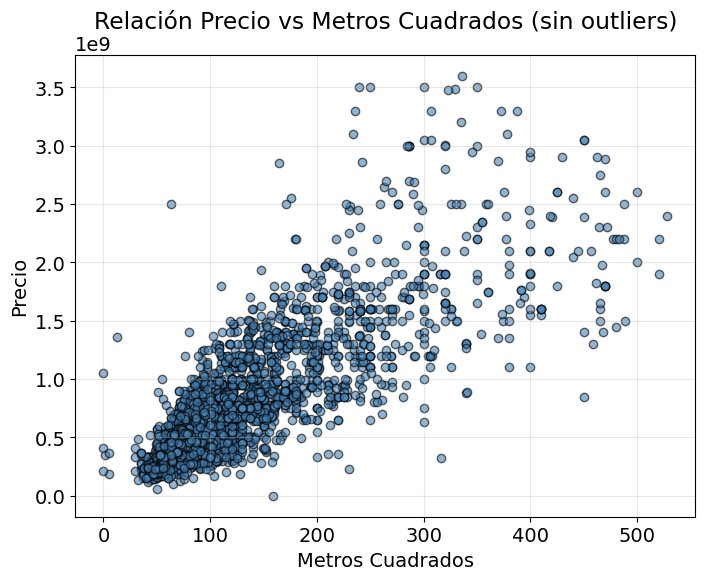

In [1836]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["Metros Cuadrados"], df["Precio"], 
            color="steelblue", alpha=0.6, edgecolor="k")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Relación Precio vs Metros Cuadrados (sin outliers)")
plt.grid(alpha=0.3)
plt.show()


#### Precisión/Exactitud:

In [1837]:
df[( df['Estrato']< 1 ) | (df['Estrato'] > 6 )] 

,ID de la propiedad,Tipo de Inmueble,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,...,Baños,Parqueaderos,Piso,Tiene Garage?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
15,192945237,Apartamento,Bello,Comuna 10,commune,61.0,61.0,0,6.325684,-75.549694,...,2,1,NaN,True,2025-10-03,2025-10-22,"Apartamento en Venta en Comuna 10, Bello",/apartamento-en-venta-en-comuna-10-bello/19294...,295224840,295000000
31,192010579,Apartamento,Bello,Centro,neighbourhood,58.0,58.0,0,6.336729,-75.559589,...,2,1,NaN,True,2025-02-12,2025-10-22,"Apartamento en Venta en Centro, Bello",/apartamento-en-venta-en-centro-bello/192010579,305230000,305000000
33,192020844,Apartamento,Bello,Buenos aires,neighbourhood,55.0,55.0,0,6.341892,-75.565154,...,2,2,NaN,True,2025-02-13,2025-10-22,"Apartamento en Venta en Buenos aires, Bello",/apartamento-en-venta-en-buenos-aires-bello/19...,250255400,250000000
36,192010581,Apartamento,Bello,Cabañitas,neighbourhood,93.0,93.0,0,6.313190,-75.561395,...,2,0,NaN,False,2025-02-12,2025-10-22,"Apartamento en Venta en Cabañitas, Bello",/apartamento-en-venta-en-cabañitas-bello/19201...,420100000,420000000
61,192971088,Apartamento,Bello,Cabañas,neighbourhood,55.0,55.0,110,6.316920,-75.567169,...,2,0,0.0,False,2025-10-10,2025-10-10,"Apartamento en Venta en Cabañas, Bello",/apartamento-en-venta-en-cabañas-bello/192971088,275200000,275000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,192885463,Apartamento,La estrella,La ferreira,neighbourhood,62.0,62.0,0,6.163719,-75.643566,...,2,1,NaN,True,2025-09-17,2025-10-22,"Apartamento en Venta en La ferreira, La estrella",/apartamento-en-venta-en-la-ferreira-la-estrel...,350300000,350000000
5455,192846264,Casa,La estrella,Poblado Del Sur,neighbourhood,137.0,137.0,0,6.158549,-75.639804,...,3,2,NaN,True,2025-09-08,2025-10-22,"Casa en Venta en Poblado Del Sur, La estrella",/casa-en-venta-en-poblado-del-sur-la-estrella/...,750353000,750000000
5559,192985963,Apartamento,La estrella,Pueblo Viejo,neighbourhood,76.0,NaN,0,6.138751,-75.635590,...,2,1,NaN,True,2025-10-15,2025-10-23,"Apartamento en Venta en Pueblo Viejo, La estrella",/apartamento-en-venta-en-pueblo-viejo-la-estre...,530270000,530000000
5576,192968035,Apartamento,La estrella,Yarumito,neighbourhood,87.0,87.0,0,6.160534,-75.627961,...,2,1,NaN,True,2025-10-09,2025-10-22,"Apartamento en Venta en Yarumito, La estrella",/apartamento-en-venta-en-yarumito-la-estrella/...,670350000,670000000


Encontramos que el hay 236 registros donde sus estratos no corresponden a los estandarizados por el gobierno, es decir registros erróneos

In [1838]:
df[(df['Precio'] <= 100000000) |  (df['Precio'] > 100000000000)]

,ID de la propiedad,Tipo de Inmueble,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,...,Baños,Parqueaderos,Piso,Tiene Garage?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
5062,192228606,Casa,La estrella,La estrella,city,159.00,159.00,4,6.247486,-75.590978,...,3,4,0.0,True,2025-04-03,2025-08-29,Casa en Venta en La estrella,/casa-en-venta-en-la-estrella/192228606,390001,1
5280,192715365,Apartamento,La estrella,La estrella,city,50.27,50.27,3,6.151145,-75.636623,...,2,0,5.0,False,2025-08-04,2025-08-25,Apartamento en Venta en La estrella,/apartamento-en-venta-en-la-estrella/192715365,55000000,55000000


Curioso, dos casas muy baratas! Una de 1 peso y una de 55 millones. Ademas 4 casas sorprendentemente caras, seguramente sean precios erróneos

In [1839]:
df['Cuartos (rooms)'].unique()

array([ 0,  3,  2,  4,  1,  6,  5,  7,  8, 10, 12])

In [1840]:
df['Baños'].unique()

array([2, 1, 5, 3, 4, 6, 7, 0, 8, 9])

In [1841]:
df['Dormitorios (bedrooms)'].unique()

array([ 3,  0,  1,  2,  4,  6,  5,  7,  8, 10, 12])

Seguramente hay casas de 15 baños, pero quizas se pueda revisar. Se ve por el analisis de mahalanobis que estos numeros combinan con los metros cuadrados.

In [1842]:
df['Localidad Principal'].unique()

array(['Niquia', 'Andalucia', 'Bello', 'Prado', 'Zona industrial 1',
       'Cabañas', 'Medellín', 'Centro', 'Comuna 10', 'San gabriel',
       'Las vegas', 'La Navarra', 'Madera', 'Santa ana',
       'Sector belvedere', 'Nazareth', 'Buenos aires',
       'Zona industrial 3', 'Cabañitas', 'Fabricato', 'El trapiche',
       'El rosario', 'Comuna 9', 'Parque tulio ospina', 'Bellavista',
       'La gabriela', 'Bucaros', 'Villas del sol', 'Paris', 'Altavista',
       'Comuna 3', 'Salento', 'Hato viejo', 'El mirador', 'Barrio Nuevo',
       'Urbanizacion amazonia', 'El paraiso', 'Fontidueño', 'Los alpes',
       'Comuna 4', 'San jose obrero', 'Urbanizacion palmar de serramonte',
       'Hospital mental', 'Playa rica', 'Laureles', 'El carmelo',
       'La primavera', 'Porvenir', 'San Antonio de Pereira', 'Quitasol',
       'Pachelly', 'Altos de quitasol', 'Asentamiento la orquidea',
       'Belén Los Alpes', 'Suarez', 'Los sauces', 'Carmelo', 'Comuna 2',
       'San martin', 'Comuna 5', 'Mol

In [1843]:
df['Tipo de Localidad Principal'].unique()

array(['neighbourhood', 'city', 'commune', 'zone', None], dtype=object)

Las columnas de localidad principal y tipo de localidad principal no son precisas. Ya que en algunos registros, esta describe la ciudad, en otros, el barrio y en otros la comuna o zona. Esto es debido a que es dependiente de lo que registró el dueño de la propiedad. Si no especificó el barrio, o la zona, se pone la ciudad. Sin embargo, las columnas de latitud y longitud cumplen el mismo trabajo, ya que las casas cercanas, tienen una latitud y longitud cercana una a otra. Por ende es pertinente borrar estas dos columnas categóricas al no aportar al modelo información adicional de lo que da la latitud y longitud.

#### Duplicados 

In [1844]:
df.duplicated().sum()

np.int64(166)

Hay 170 registros duplicados, sin embargo quiero ver ademas segun el ID cuantos registros hay duplicados, y con el url

In [1845]:
df['URL'].duplicated().sum()

np.int64(166)

In [1846]:
df['ID de la propiedad'].duplicated().sum()

np.int64(166)

In [1847]:
df[df[['Latitud', 'Longitud']].duplicated()][['ID de la propiedad','Latitud', 'Longitud', 'URL', 'Localidad Principal']]

,ID de la propiedad,Latitud,Longitud,URL,Localidad Principal
11,192917583,6.336729,-75.559589,/apartamento-en-venta-en-centro-bello/192917583,Centro
18,192963579,6.336729,-75.559589,/apartamento-en-venta-en-bello/192963579,Bello
21,191989764,6.336729,-75.559589,/apartamento-en-venta-en-bello/191989764,Bello
22,191990438,6.336729,-75.559589,/apartamento-en-venta-en-centro-bello/191990438,Centro
24,191997110,6.317037,-75.553427,/apartamento-en-venta-en-sector-belvedere-bell...,Sector belvedere
...,...,...,...,...,...
5616,193012696,6.167573,-75.646430,/apartamento-en-venta-en-la-ferreria-la-estrel...,La ferreria
5619,193013537,6.164737,-75.643079,/casa-en-venta-en-suramerica-la-estrella/19301...,Suramerica
5620,193016866,6.126384,-75.635566,/apartamento-en-venta-en-la-tablaza-la-estrell...,La Tablaza
5621,193021987,6.163692,-75.647383,/apartamento-en-venta-en-la-ferreria-la-estrel...,La ferreria


Hay casas con latitud y longitud repetida, pero son registros distintos (esto se puede ver ya que el ID es distinto, y al ingresar a la URL, la casa es distinta). Por ende, la latitud y longitud expresan unicamente el sector especifico donde esta la casa, mas no exactamente la ubicacion. De hecho al ver Localidad Principal de repetidos, se puede ver que estan en la misma zona. 

#### Integridad

Debido a la fuente de los datos, no es necesario hacer un análisis de integridad

In [1848]:
df.describe()

,ID de la propiedad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Piso,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Precio con Administración Incluida,Precio
count,5.580000e+03,5580.000000,4641.000000,5580.000000,5580.000000,5580.000000,5461.000000,5580.000000,5580.000000,5580.000000,5580.000000,5375.000000,5580,5580,5.580000e+03,5.580000e+03
mean,1.894702e+08,100.500112,101.616505,4.126882,6.200262,-75.598533,2.283831,2.220968,2.856631,2.321326,1.069355,5.377860,2025-08-09 00:33:17.419354880,2025-09-26 15:29:32.903225856,6.289220e+08,6.267384e+08
min,5.093501e+06,0.000000,0.000000,0.000000,6.032140,-75.658841,0.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,2019-11-19 00:00:00,2025-03-14 00:00:00,3.900010e+05,1.000000e+00
25%,1.926729e+08,62.000000,62.000000,3.000000,6.153696,-75.625898,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2025-07-23 00:00:00,2025-09-11 00:00:00,3.500000e+08,3.500000e+08
50%,1.928898e+08,75.000000,76.000000,4.000000,6.167793,-75.602453,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2025-09-18 00:00:00,2025-10-14 00:00:00,4.850000e+08,4.800000e+08
75%,1.929939e+08,110.000000,111.710000,4.000000,6.226663,-75.570546,3.000000,3.000000,3.000000,2.000000,1.000000,10.000000,2025-10-17 00:00:00,2025-10-27 00:00:00,7.406802e+08,7.400000e+08
max,1.930546e+08,528.000000,528.000000,110.000000,6.360419,-75.398106,5.000000,12.000000,12.000000,9.000000,11.000000,97.000000,2025-11-01 00:00:00,2025-11-04 00:00:00,4.297484e+09,3.600000e+09
std,2.435064e+07,68.910538,70.233743,6.075113,0.068031,0.031406,1.311408,1.408788,0.815835,0.894594,0.990559,6.891762,NaN,NaN,4.576282e+08,4.531525e+08


Se ven cosas curiosas, como que el estrato de uno de los registros sea 110. 

De resto, las otras columnas aparentan ser normales, aunque los metros cuadrados y los pisos tienen una excepción extraña, donde el máximo parece ser de 133377. Eso es un resultado un poco loco, dado en cuenta que el tercer cuartil es de 114, y el piso máximo es el 97 (no se que edificio tiene 97 pisos en el valle de aburrá) y el mínimo es el -1, que podría ser un sótano o un error. Un precio máximo de 6.3 e11 también es muy muy muy elevado, altamente probable que este sea una anomalía.


In [1849]:
ugly_data

,ID de la propiedad,Tipo de Operacion,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Venta,Apartamento,Antioquia,Bello,Niquia,neighbourhood,59.0,NaN,3,...,False,False,False,True,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
1,192805940,Venta,Apartamento,Antioquia,Bello,Andalucia,neighbourhood,64.9,64.9,3,...,False,False,False,True,2025-08-29,2025-08-29,"Apartamento en Venta en Andalucia, Bello",/apartamento-en-venta-en-andalucia-bello/19280...,280000000,280000000
2,192833958,Venta,Apartamento,Antioquia,Bello,Bello,city,67.0,NaN,3,...,False,False,False,True,2025-09-04,2025-10-30,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192833958,260241000,260000000
3,192839470,Venta,Apartamento,Antioquia,Bello,Bello,city,72.0,72.0,3,...,False,False,False,True,2025-09-05,2025-09-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192839470,433369521,433000000
4,192852231,Venta,Casa,Antioquia,Bello,Prado,neighbourhood,91.0,91.0,3,...,False,False,False,True,2025-09-09,2025-09-29,"Casa en Venta en Prado, Bello",/casa-en-venta-en-prado-bello/192852231,295000000,295000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,193012680,Venta,Apartamento,Antioquia,La estrella,La ferreira,neighbourhood,53.0,NaN,4,...,False,False,False,True,2025-10-22,2025-10-22,"Apartamento en Venta en La ferreira, La estrella",/apartamento-en-venta-en-la-ferreira-la-estrel...,350197000,350000000
5823,193013537,Venta,Casa,Antioquia,La estrella,Suramerica,neighbourhood,147.0,NaN,4,...,False,False,False,True,2025-10-22,2025-10-22,"Casa en Venta en Suramerica, La estrella",/casa-en-venta-en-suramerica-la-estrella/19301...,890280000,890000000
5824,193016866,Venta,Apartamento,Antioquia,La estrella,La Tablaza,neighbourhood,48.0,NaN,3,...,False,False,False,True,2025-10-23,2025-10-23,"Apartamento en Venta en La Tablaza, La estrella",/apartamento-en-venta-en-la-tablaza-la-estrell...,230000000,230000000
5825,193021987,Venta,Apartamento,Antioquia,La estrella,La ferreria,neighbourhood,78.0,78.0,4,...,False,False,False,True,2025-10-24,2025-10-24,"Apartamento en Venta en La ferreria, La estrella",/apartamento-en-venta-en-la-ferreria-la-estrel...,528200000,528000000


# Preparación de datos

En esta seccion se hará una copia de los datos y se harán las transformaciones necesarias para que se pueda usar en el modelo

In [1850]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Metros Cuadrados Construidos', 'Estrato',
       'Latitud', 'Longitud', 'Antigüedad (Grupo)', 'Cuartos (rooms)',
       'Dormitorios (bedrooms)', 'Baños', 'Parqueaderos', 'Piso',
       'Tiene Garage?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL',
       'Precio con Administración Incluida', 'Precio'],
      dtype='object')

In [1851]:
df.isna().sum()

ID de la propiedad                      0
Tipo de Inmueble                        0
Ciudad                                  0
Localidad Principal                     4
Tipo de Localidad Principal             4
Metros Cuadrados                        0
Metros Cuadrados Construidos          939
Estrato                                 0
Latitud                                 0
Longitud                                0
Antigüedad (Grupo)                    119
Cuartos (rooms)                         0
Dormitorios (bedrooms)                  0
Baños                                   0
Parqueaderos                            0
Piso                                  205
Tiene Garage?                           0
Fecha de Creacion de Oferta             0
Fecha de Actualización de Oferta        0
Dirección                               0
URL                                     0
Precio con Administración Incluida      0
Precio                                  0
dtype: int64

In [1852]:
dm = df.copy()

In [1854]:
dm = dm.drop(['ID de la propiedad', 'Localidad Principal', 'Tipo de Localidad Principal', 'Piso', 'URL', 'Dirección' , 'Fecha de Creacion de Oferta'], axis = 1)


In [1855]:
dm.head()

,Tipo de Inmueble,Ciudad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Tiene Garage?,Fecha de Actualización de Oferta,Precio con Administración Incluida,Precio
0,Apartamento,Bello,59.0,NaN,3,6.343308,-75.542227,2.0,0,3,2,0,False,2025-09-16,275000000,275000000
1,Apartamento,Bello,64.9,64.9,3,6.340643,-75.560242,NaN,0,0,2,0,False,2025-08-29,280000000,280000000
2,Apartamento,Bello,67.0,NaN,3,6.341758,-75.578913,3.0,3,3,2,1,True,2025-10-30,260241000,260000000
3,Apartamento,Bello,72.0,72.0,3,6.340513,-75.539474,2.0,3,3,2,1,True,2025-09-20,433369521,433000000
4,Casa,Bello,91.0,91.0,3,6.335474,-75.555586,4.0,3,3,2,0,False,2025-09-29,295000000,295000000


In [1856]:
dm = dm.dropna(subset=['Antigüedad (Grupo)'])
print(dm.shape)
dm.head()

(5461, 16)


,Tipo de Inmueble,Ciudad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Tiene Garage?,Fecha de Actualización de Oferta,Precio con Administración Incluida,Precio
0,Apartamento,Bello,59.0,NaN,3,6.343308,-75.542227,2.0,0,3,2,0,False,2025-09-16,275000000,275000000
2,Apartamento,Bello,67.0,NaN,3,6.341758,-75.578913,3.0,3,3,2,1,True,2025-10-30,260241000,260000000
3,Apartamento,Bello,72.0,72.0,3,6.340513,-75.539474,2.0,3,3,2,1,True,2025-09-20,433369521,433000000
4,Casa,Bello,91.0,91.0,3,6.335474,-75.555586,4.0,3,3,2,0,False,2025-09-29,295000000,295000000
6,Apartamento,Bello,69.0,NaN,4,6.319698,-75.567210,2.0,3,3,2,1,True,2025-11-04,425000000,425000000


In [1857]:
dm = dm.dropna(subset = ['Metros Cuadrados'])
print(dm.shape)
dm.head()

(5461, 16)


,Tipo de Inmueble,Ciudad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Tiene Garage?,Fecha de Actualización de Oferta,Precio con Administración Incluida,Precio
0,Apartamento,Bello,59.0,NaN,3,6.343308,-75.542227,2.0,0,3,2,0,False,2025-09-16,275000000,275000000
2,Apartamento,Bello,67.0,NaN,3,6.341758,-75.578913,3.0,3,3,2,1,True,2025-10-30,260241000,260000000
3,Apartamento,Bello,72.0,72.0,3,6.340513,-75.539474,2.0,3,3,2,1,True,2025-09-20,433369521,433000000
4,Casa,Bello,91.0,91.0,3,6.335474,-75.555586,4.0,3,3,2,0,False,2025-09-29,295000000,295000000
6,Apartamento,Bello,69.0,NaN,4,6.319698,-75.567210,2.0,3,3,2,1,True,2025-11-04,425000000,425000000


In [1859]:
dm = dm[dm['Antigüedad (Grupo)'] !=0]
print(dm.shape)
dm.head()

(4730, 16)


,Tipo de Inmueble,Ciudad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Tiene Garage?,Fecha de Actualización de Oferta,Precio con Administración Incluida,Precio
0,Apartamento,Bello,59.0,NaN,3,6.343308,-75.542227,2.0,0,3,2,0,False,2025-09-16,275000000,275000000
2,Apartamento,Bello,67.0,NaN,3,6.341758,-75.578913,3.0,3,3,2,1,True,2025-10-30,260241000,260000000
3,Apartamento,Bello,72.0,72.0,3,6.340513,-75.539474,2.0,3,3,2,1,True,2025-09-20,433369521,433000000
4,Casa,Bello,91.0,91.0,3,6.335474,-75.555586,4.0,3,3,2,0,False,2025-09-29,295000000,295000000
6,Apartamento,Bello,69.0,NaN,4,6.319698,-75.567210,2.0,3,3,2,1,True,2025-11-04,425000000,425000000


In [1861]:
dm = dm[(dm['Estrato'] < 7) & (dm['Estrato'] > 0)]
dm.shape

(4531, 16)

In [1864]:
dm = dm[dm['Parqueaderos'] >=0]
dm.shape

(4528, 16)

In [1866]:
# --- Crear variables dummy ---
dummies = pd.get_dummies(
    dm[["Tipo de Inmueble", "Ciudad"]],
    prefix=["tipo", "ciudad"],
    
)

# --- Añadirlas al DataFrame original ---
dm = pd.concat([dm, dummies], axis=1)

# 🧹 --- Eliminar las columnas originales ---
dm = dm.drop(columns=["Tipo de Inmueble", "Ciudad"])
